<a href="https://colab.research.google.com/github/heizsen/Ai/blob/main/Azis_Natural_Language_Processing_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pysastrawi
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/IanNarsa/sentiment-analysis/master/data/testSentimen.csv",header=None).rename({0:'sentimen',1:'text'},axis=1)
data.head()

,sentimen,text
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...


# Text Preprocessing

In [ ]:
print(data.text[0])

|@PrincessSuperC Hai Cici tersayang! Cuma mau memberitaukan kalau saya cinta kamu! OH! Dan akan berkunjung secepatnya? Fantasi berkendari 5 Mei!!!!|


## Case Folding

- Ubah teks ke lowercase
- Menghilangkan tanda baca
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan stopwords
- Stemming

In [ ]:
#Ubah teks ke lowercase

teks = data.text[0]
teks_lower = teks.lower()
teks_lower

'|@princesssuperc hai cici tersayang! cuma mau memberitaukan kalau saya cinta kamu! oh! dan akan berkunjung secepatnya? fantasi berkendari 5 mei!!!!|'

In [ ]:
#Menghilangkan tanda baca
import string

teks_punc = teks_lower.translate(str.maketrans("","",string.punctuation))
teks_punc

'princesssuperc hai cici tersayang cuma mau memberitaukan kalau saya cinta kamu oh dan akan berkunjung secepatnya fantasi berkendari 5 mei'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Tanda @ pada username hilang, sehingga nanti kita tidak bisa menghapus username dengan mudah karena tidak diperlukan

import re

teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_lower) #Menghilangkan mention
teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
teks_punc = re.sub(r"\\n"," ",teks_punc) #Menghilangkan \n
teks_punc = teks_punc.strip()
teks_punc = re.sub(r"http\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub(r"www.\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub("[^A-Za-z\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
teks_punc = re.sub("rt"," ",teks_punc) #Menghilangkan RT
teks_punc = ' '.join(teks_punc.split())
teks_punc

'hai cici tersayang cuma mau memberitaukan kalau saya cinta kamu oh dan akan berkunjung secepatnya fantasi berkendari mei'

In [ ]:
"spasi -> \s"
"tab -> \t"
"enter/newline -> \n"

'enter/newline -> \n'

In [ ]:
teks_punc

'hai cici tersayang cuma mau memberitaukan kalau saya cinta kamu oh dan akan berkunjung secepatnya fantasi berkendari mei'

In [ ]:
#Menghilangkan stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stpwds_id = list(set(stopwords.words('indonesian')))
stpwds_id.append('oh')

tokens = word_tokenize(teks_punc)

teks_stopwords = ' '.join([word for word in tokens if word not in stpwds_id])
teks_stopwords

'hai cici tersayang memberitaukan cinta berkunjung secepatnya fantasi berkendari mei'

In [ ]:
tokens

['hai',
 'cici',
 'tersayang',
 'cuma',
 'mau',
 'memberitaukan',
 'kalau',
 'saya',
 'cinta',
 'kamu',
 'oh',
 'dan',
 'akan',
 'berkunjung',
 'secepatnya',
 'fantasi',
 'berkendari',
 'mei']

In [ ]:
#Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

teks_stemm   = stemmer.stem(teks_stopwords)
teks_stemm

'hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei'

In [ ]:
stemmer.stem('hai cici tersayang menyapu cinta oh kunjung cepat fantasi berkendara mei')

'hai cici sayang sapu cinta oh kunjung cepat fantasi kendara mei'

In [ ]:
#Buat fungsi supaya bisa diterapkan pada dataframe

def text_proses(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
  teks = teks.strip()
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  teks = re.sub("rt"," ",teks) #Menghilangkan RT
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_id])
  teks = stemmer.stem(teks)
  return teks

In [ ]:
data['text_processed'] = data['text'].apply(lambda x: text_proses(x))
data

,sentimen,text,text_processed
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif
...,...,...,...
3704,|positive|,|yay|,yay
3705,|positive|,|yeah|,yeah
3706,|positive|,|yihaa|,yihaa
3707,|negative|,|dungu|,dungu


In [ ]:
data.sentimen.unique()

array(['|positive|', '|neutral|', '|negative|', '|netral|'], dtype=object)

In [ ]:
data['label'] = data['sentimen'].replace({'|negative|' : 0, '|neutral|' : 1, '|netral|' : 1, '|positive|' : 2})
data

,sentimen,text,text_processed,label
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...,2
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman,2
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik,2
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...,2
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif,2
...,...,...,...,...
3704,|positive|,|yay|,yay,2
3705,|positive|,|yeah|,yeah,2
3706,|positive|,|yihaa|,yihaa,2
3707,|negative|,|dungu|,dungu,0


In [ ]:
data['label'].value_counts()

label
0    2570
2     982
1     157
Name: count, dtype: int64

#Tokenization & Word Embedding

## Traditional Machine Learning with Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.text_processed, data.label, test_size=0.25, random_state=46, stratify=data.label)

In [ ]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<2781x2337 sparse matrix of type '<class 'numpy.int64'>'
	with 5599 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_vec)

  (0, 2165)	1
  (0, 1827)	1
  (0, 693)	1
  (0, 1795)	1
  (0, 444)	1
  (0, 2191)	1
  (0, 1719)	1
  (0, 1243)	1
  (0, 2323)	1
  (0, 2318)	1
  (1, 1253)	1
  (1, 1)	1
  (2, 1936)	1
  (2, 1272)	1
  (3, 1406)	1
  (3, 158)	1
  (4, 1326)	1
  (5, 2323)	1
  (5, 2318)	1
  (5, 52)	1
  (5, 283)	1
  (5, 267)	1
  (5, 1748)	1
  (5, 317)	1
  (5, 1384)	2
  :	:
  (2772, 92)	1
  (2772, 1582)	1
  (2772, 1355)	1
  (2772, 2317)	1
  (2772, 1634)	1
  (2772, 1637)	1
  (2772, 59)	1
  (2772, 1893)	1
  (2773, 313)	1
  (2773, 1998)	1
  (2774, 736)	1
  (2775, 2119)	1
  (2776, 2323)	1
  (2776, 2318)	1
  (2777, 1908)	1
  (2778, 6)	1
  (2779, 2193)	1
  (2779, 1663)	1
  (2779, 1544)	1
  (2779, 982)	1
  (2779, 2180)	1
  (2779, 168)	1
  (2779, 436)	1
  (2779, 1059)	1
  (2780, 331)	1


In [ ]:
X_train.loc[4]

'polri reuni jalan kondusif'

In [ ]:
X_train.iloc[4]

'memar'

In [ ]:
Vectorize.vocabulary_.keys()

dict_keys(['tetap', 'sabar', 'hina', 'risau', 'dgn', 'tl', 'rakyat', 'lugu', 'xe', 'xa', 'ma', 'abat', 'sepe', 'malaikat', 'murah', 'banget', 'memar', 'alhamdulilah', 'brkat', 'bntuan', 'rekan', 'bwa', 'mrka', 'br', 'sdh', 'plg', 'krmh', 'msing', 'sy', 'mngucapkan', 'byk', 'trimakasih', 'kpda', 'yg', 'trlibat', 'utk', 'kplgn', 'tipu', 'ayo', 'polisi', 'dukung', 'cc', 'kasih', 'kendor', 'abnormal', 'negeri', 'beku', 'minim', 'resiko', 'tarik', 'mene', 'awa', 'panggil', 'terima', 'hadap', 'kamis', 'besok', 'jemput', 'paksa', 'masyhur', 'umur', 'pendek', 'rongga', 'ketidakmungkinan', 'fitnah', 'damai', 'destruktif', 'dupa', 'besar', 'tamak', 'hukum', 'timpal', 'tlg', 'kontol', 'hati', 'serba', 'cepat', 'terkadang', 'bingung', 'ahok', 'ratna', 'sarumpaet', 'buni', 'yani', 'timbun', 'nih', 'rekam', 'jejekanya', 'sila', 'simak', 'berkel', 'lambat', 'setia', 'tabung', 'amuk', 'keramat', 'pandang', 'bulu', 'nyawa', 'abur', 'gigih', 'sakit', 'salah', 'baca', 'jangkit', 'keluar', 'isi', 'perut',

In [ ]:
Vectorize.get_feature_names_out()[1326]

'memar'

In [ ]:
Transformer = TfidfTransformer()

X_train_tfidf = Transformer.fit_transform(X_train_vec)
X_test_tfidf = Transformer.transform(X_test_vec)

X_train_tfidf

<2781x2337 sparse matrix of type '<class 'numpy.float64'>'
	with 5599 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_tfidf)

  (0, 2323)	0.1722715094291341
  (0, 2318)	0.17206980281540352
  (0, 2191)	0.3607237742431507
  (0, 2165)	0.3607237742431507
  (0, 1827)	0.34618793569237843
  (0, 1795)	0.3607237742431507
  (0, 1719)	0.3402366604678577
  (0, 1243)	0.3699360156987826
  (0, 693)	0.28111595587729016
  (0, 444)	0.31442594959742437
  (1, 1253)	0.7071067811865475
  (1, 1)	0.7071067811865475
  (2, 1936)	0.6584071722849192
  (2, 1272)	0.7526619397071815
  (3, 1406)	0.665873969180043
  (3, 158)	0.7460642446655751
  (4, 1326)	1.0
  (5, 2332)	0.14292361367605502
  (5, 2323)	0.0933985014997463
  (5, 2318)	0.09328914449969763
  (5, 2280)	0.20667680810538533
  (5, 2210)	0.21455753976660558
  (5, 2209)	0.21455753976660558
  (5, 2067)	0.20056403773060377
  (5, 1877)	0.20667680810538533
  :	:
  (2772, 1634)	0.30354156790863146
  (2772, 1582)	0.30354156790863146
  (2772, 1355)	0.30354156790863146
  (2772, 1300)	0.29832342127075434
  (2772, 700)	0.2728330400664316
  (2772, 396)	0.2894330992561211
  (2772, 92)	0.272833040

## Embedding Layer in Deep Learning with Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding

In [ ]:
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 2337
Panjang maksimum kalimat: 33 kata


In [ ]:
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # jika ingin menggunakan sequential API
                                       )

text_vectorization.adapt(X_train) #adapt seperti fit

In [ ]:
data.text_processed[0]

'hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei'

In [ ]:
text_vectorization([data.text_processed[0]])

<tf.Tensor: shape=(1, 33), dtype=int64, numpy=
array([[1971, 2165,   87, 1574,  520, 1679,   29, 2043, 2235, 1581,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
text_vectorization(['i love you no matter what'])

<tf.Tensor: shape=(1, 33), dtype=int64, numpy=
array([[  26,    1,    1, 1494,    1,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
text_vectorization.get_vocabulary()[1]

'[UNK]'

In [ ]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [ ]:
data.text_processed[0]

'hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei'

In [ ]:
text_vectorization([data.text_processed[0]])

<tf.Tensor: shape=(1, 33), dtype=int64, numpy=
array([[1971, 2165,   87, 1574,  520, 1679,   29, 2043, 2235, 1581,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
emb_res = embedding(text_vectorization([data.text_processed[0]]))
emb_res

<tf.Tensor: shape=(1, 33, 128), dtype=float32, numpy=
array([[[-0.01672595, -0.00189681, -0.02991526, ..., -0.03998153,
         -0.00624397,  0.00326812],
        [ 0.0348036 , -0.04415594, -0.02872524, ...,  0.02350538,
          0.02987958, -0.01696335],
        [-0.00126517, -0.00779136, -0.02428019, ...,  0.02608306,
         -0.02722759,  0.01466446],
        ...,
        [-0.01664593, -0.04380894,  0.04143948, ..., -0.00993607,
         -0.02395709, -0.04503101],
        [-0.01664593, -0.04380894,  0.04143948, ..., -0.00993607,
         -0.02395709, -0.04503101],
        [-0.01664593, -0.04380894,  0.04143948, ..., -0.00993607,
         -0.02395709, -0.04503101]]], dtype=float32)>

In [ ]:
emb_res[0][0] #hai

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01672595, -0.00189681, -0.02991526, -0.01923413,  0.00146195,
        0.03118703, -0.04017546, -0.01733918, -0.01913751, -0.04662701,
        0.02896674,  0.02932059,  0.0489308 , -0.00806852, -0.03297716,
       -0.04132888, -0.01963257,  0.04784304, -0.04216186,  0.00427972,
       -0.04919861, -0.04963357, -0.01084508,  0.01663199,  0.04692099,
        0.02521223, -0.00881303,  0.04069403, -0.01495882,  0.04089076,
        0.02702891,  0.03880658, -0.02466956,  0.01385557, -0.00416442,
       -0.00438427,  0.01012237, -0.03791196,  0.04361929, -0.00411034,
       -0.04327673,  0.04005693,  0.00851918, -0.04089205,  0.00945039,
        0.03303755,  0.03169117,  0.01233489,  0.04107812,  0.00725484,
       -0.00418253,  0.00340276,  0.01935387,  0.02688005, -0.03562368,
        0.03543222, -0.03955223,  0.04543582, -0.01361078, -0.03439382,
        0.02197199, -0.01580064, -0.01674648,  0.00919007, -0.04406532,
       -0.029161

# Modeling

## Traditional Machine Learning

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred = nb.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       643
           1       1.00      0.05      0.10        39
           2       0.57      0.26      0.36       246

    accuracy                           0.72       928
   macro avg       0.77      0.42      0.43       928
weighted avg       0.71      0.72      0.68       928



## Deep Learning - Fully Connected Layer

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
y_train_ohe

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
pd.get_dummies(y_train)

,0,1,2
368,False,False,True
3089,False,False,True
3508,False,False,True
3289,False,False,True
1611,True,False,False
...,...,...,...
246,False,True,False
712,True,False,False
502,True,False,False
326,False,False,True


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential

### DNN

**Cara Word Embedding 1**

In [ ]:
# [ [128], [128], [...], [128], [128]] 2000 x 33 x 128
# [ avg_token1, avg_token2, ...., avg_token33]

In [ ]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_dnn_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/50
87/87 [==============================] - 7s 62ms/step - loss: 0.8314 - accuracy: 0.6857 - val_loss: 0.7257 - val_accuracy: 0.6929
Epoch 2/50
87/87 [==============================] - 1s 15ms/step - loss: 0.7128 - accuracy: 0.6947 - val_loss: 0.7086 - val_accuracy: 0.6972
Epoch 3/50
87/87 [==============================] - 1s 9ms/step - loss: 0.6944 - accuracy: 0.7001 - val_loss: 0.6923 - val_accuracy: 0.7015
Epoch 4/50
87/87 [==============================] - 1s 8ms/step - loss: 0.6627 - accuracy: 0.7138 - val_loss: 0.6654 - val_accuracy: 0.7112
Epoch 5/50
87/87 [==============================] - 1s 9ms/step - loss: 0.6175 - accuracy: 0.7217 - val_loss: 0.6358 - val_accuracy: 0.7166
Epoch 6/50
87/87 [==============================] - 0s 6ms/step - loss: 0.5527 - accuracy: 0.7361 - val_loss: 0.6218 - val_accuracy: 0.7166
Epoch 7/50
87/87 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.7706 - val_loss: 0.5960 - val_accuracy: 0.7209
Epoch 8/50
87/87 [

<Axes: >

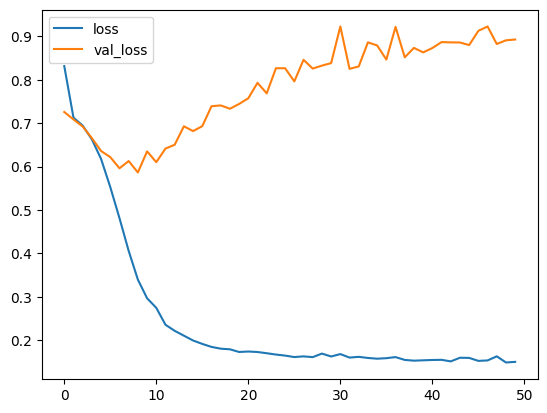

In [ ]:
metrics = pd.DataFrame(model_dnn_hist_1.history)
metrics[['loss', 'val_loss']].plot()

**Cara Word Embedding 2**

In [ ]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jml_vocab
                      )

model = Sequential()
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_dnn_hist_2 = model.fit(X_train_tfidf.todense(),
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test_tfidf.todense(), y_test_ohe))

Epoch 1/50
87/87 [==============================] - 3s 14ms/step - loss: 0.9044 - accuracy: 0.6764 - val_loss: 0.7471 - val_accuracy: 0.6929
Epoch 2/50
87/87 [==============================] - 1s 12ms/step - loss: 0.7428 - accuracy: 0.6929 - val_loss: 0.7401 - val_accuracy: 0.6929
Epoch 3/50
87/87 [==============================] - 1s 14ms/step - loss: 0.7409 - accuracy: 0.6929 - val_loss: 0.7444 - val_accuracy: 0.6929
Epoch 4/50
87/87 [==============================] - 1s 17ms/step - loss: 0.7414 - accuracy: 0.6929 - val_loss: 0.7394 - val_accuracy: 0.6929
Epoch 5/50
87/87 [==============================] - 1s 15ms/step - loss: 0.7413 - accuracy: 0.6929 - val_loss: 0.7396 - val_accuracy: 0.6929
Epoch 6/50
87/87 [==============================] - 1s 15ms/step - loss: 0.7410 - accuracy: 0.6929 - val_loss: 0.7398 - val_accuracy: 0.6929
Epoch 7/50
87/87 [==============================] - 1s 10ms/step - loss: 0.7410 - accuracy: 0.6929 - val_loss: 0.7393 - val_accuracy: 0.6929
Epoch 8/50
87

In [ ]:
print(jml_vocab)
print(X_train_tfidf.shape)

<Axes: >

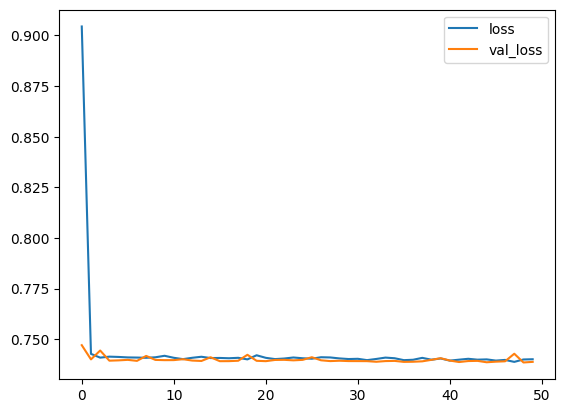

In [ ]:
metrics = pd.DataFrame(model_dnn_hist_2.history)
metrics[['loss', 'val_loss']].plot()

### LSTM

**Cara Word Embedding 1**

In [ ]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_lstm_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/50
87/87 [==============================] - 10s 64ms/step - loss: 0.7746 - accuracy: 0.6753 - val_loss: 0.7440 - val_accuracy: 0.6929
Epoch 2/50
87/87 [==============================] - 3s 29ms/step - loss: 0.7251 - accuracy: 0.6951 - val_loss: 0.6916 - val_accuracy: 0.6972
Epoch 3/50
87/87 [==============================] - 1s 16ms/step - loss: 0.6395 - accuracy: 0.7174 - val_loss: 0.6879 - val_accuracy: 0.7101
Epoch 4/50
87/87 [==============================] - 1s 13ms/step - loss: 0.6202 - accuracy: 0.7242 - val_loss: 0.6912 - val_accuracy: 0.7123
Epoch 5/50
87/87 [==============================] - 1s 9ms/step - loss: 0.6086 - accuracy: 0.7386 - val_loss: 0.6926 - val_accuracy: 0.7101
Epoch 6/50
87/87 [==============================] - 1s 15ms/step - loss: 0.6247 - accuracy: 0.7256 - val_loss: 0.6987 - val_accuracy: 0.7112
Epoch 7/50
87/87 [==============================] - 1s 11ms/step - loss: 0.6105 - accuracy: 0.7318 - val_loss: 0.6880 - val_accuracy: 0.7144
Epoch 8/50
87

<Axes: >

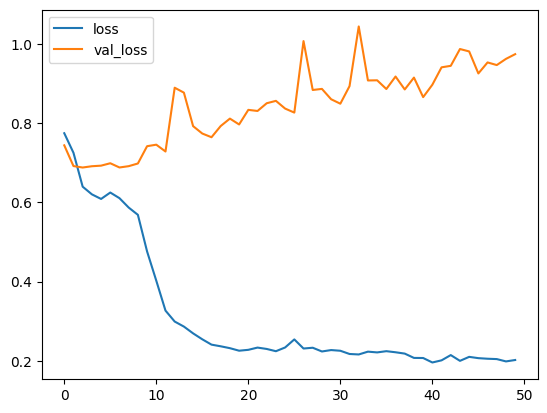

In [ ]:
metrics = pd.DataFrame(model_lstm_hist_1.history)
metrics[['loss', 'val_loss']].plot()

**Cara Word Embedding 2**

In [ ]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jml_vocab
                      )

model = Sequential()
model.add(embedding)
model.add(LSTM(32))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_lstm_hist_2 = model.fit(X_train_tfidf.todense(),
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test_tfidf.todense(), y_test_ohe))

Epoch 1/50
87/87 [==============================] - 9s 76ms/step - loss: 0.7922 - accuracy: 0.6886 - val_loss: 0.7412 - val_accuracy: 0.6929
Epoch 2/50
87/87 [==============================] - 6s 73ms/step - loss: 0.7443 - accuracy: 0.6929 - val_loss: 0.7395 - val_accuracy: 0.6929
Epoch 3/50
87/87 [==============================] - 7s 77ms/step - loss: 0.7421 - accuracy: 0.6929 - val_loss: 0.7413 - val_accuracy: 0.6929
Epoch 4/50
87/87 [==============================] - 6s 72ms/step - loss: 0.7420 - accuracy: 0.6929 - val_loss: 0.7401 - val_accuracy: 0.6929
Epoch 5/50
87/87 [==============================] - 6s 65ms/step - loss: 0.7419 - accuracy: 0.6929 - val_loss: 0.7401 - val_accuracy: 0.6929
Epoch 6/50
87/87 [==============================] - 6s 72ms/step - loss: 0.7413 - accuracy: 0.6929 - val_loss: 0.7403 - val_accuracy: 0.6929
Epoch 7/50
87/87 [==============================] - 6s 65ms/step - loss: 0.7415 - accuracy: 0.6929 - val_loss: 0.7404 - val_accuracy: 0.6929
Epoch 8/50
87

<Axes: >

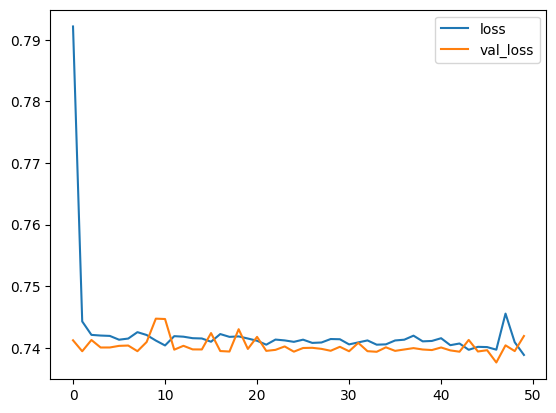

In [ ]:
metrics = pd.DataFrame(model_lstm_hist_2.history)
metrics[['loss', 'val_loss']].plot()

### GRU

**Cara Word Embedding 1**

In [ ]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_gru_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/50
87/87 [==============================] - 9s 67ms/step - loss: 0.7832 - accuracy: 0.6886 - val_loss: 0.7421 - val_accuracy: 0.6929
Epoch 2/50
87/87 [==============================] - 2s 27ms/step - loss: 0.7411 - accuracy: 0.6929 - val_loss: 0.7342 - val_accuracy: 0.6929
Epoch 3/50
87/87 [==============================] - 1s 14ms/step - loss: 0.7170 - accuracy: 0.6954 - val_loss: 0.6794 - val_accuracy: 0.6994
Epoch 4/50
87/87 [==============================] - 1s 13ms/step - loss: 0.4653 - accuracy: 0.8019 - val_loss: 0.6917 - val_accuracy: 0.7241
Epoch 5/50
87/87 [==============================] - 1s 10ms/step - loss: 0.3014 - accuracy: 0.8806 - val_loss: 0.8541 - val_accuracy: 0.7231
Epoch 6/50
87/87 [==============================] - 1s 8ms/step - loss: 0.2460 - accuracy: 0.9022 - val_loss: 0.7372 - val_accuracy: 0.7338
Epoch 7/50
87/87 [==============================] - 1s 10ms/step - loss: 0.2129 - accuracy: 0.9076 - val_loss: 0.9449 - val_accuracy: 0.7328
Epoch 8/50
87/

<Axes: >

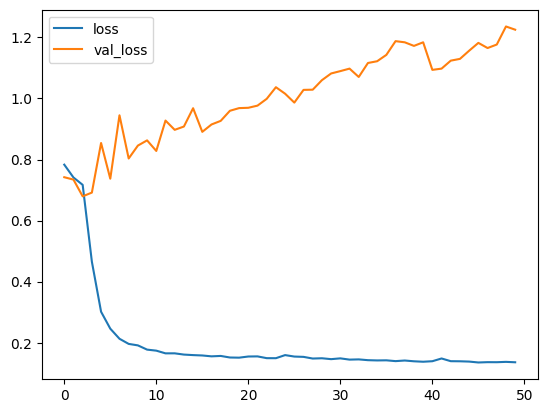

In [ ]:
metrics = pd.DataFrame(model_gru_hist_1.history)
metrics[['loss', 'val_loss']].plot()

**Cara Word Embedding 2**

In [ ]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jml_vocab
                      )

model = Sequential()
model.add(embedding)
model.add(GRU(32))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_gru_hist_2 = model.fit(X_train_tfidf.todense(),
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test_tfidf.todense(), y_test_ohe))

Epoch 1/50
87/87 [==============================] - 8s 76ms/step - loss: 0.7784 - accuracy: 0.6929 - val_loss: 0.7423 - val_accuracy: 0.6929
Epoch 2/50
87/87 [==============================] - 6s 66ms/step - loss: 0.7429 - accuracy: 0.6929 - val_loss: 0.7464 - val_accuracy: 0.6929
Epoch 3/50
87/87 [==============================] - 6s 71ms/step - loss: 0.7428 - accuracy: 0.6929 - val_loss: 0.7425 - val_accuracy: 0.6929
Epoch 4/50
87/87 [==============================] - 6s 65ms/step - loss: 0.7447 - accuracy: 0.6929 - val_loss: 0.7411 - val_accuracy: 0.6929
Epoch 5/50
87/87 [==============================] - 7s 78ms/step - loss: 0.7440 - accuracy: 0.6929 - val_loss: 0.7402 - val_accuracy: 0.6929
Epoch 6/50
87/87 [==============================] - 6s 72ms/step - loss: 0.7422 - accuracy: 0.6929 - val_loss: 0.7397 - val_accuracy: 0.6929
Epoch 7/50
87/87 [==============================] - 6s 71ms/step - loss: 0.7434 - accuracy: 0.6929 - val_loss: 0.7465 - val_accuracy: 0.6929
Epoch 8/50
87

<Axes: >

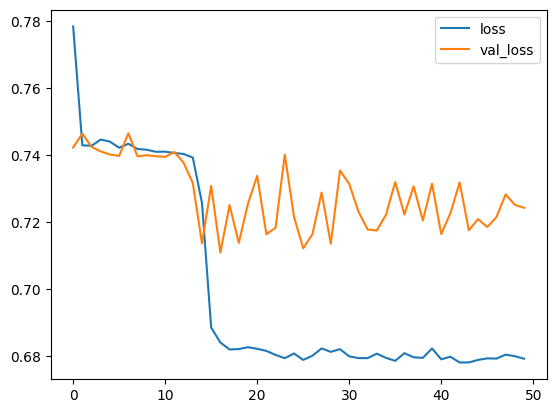

In [ ]:
metrics = pd.DataFrame(model_gru_hist_2.history)
metrics[['loss', 'val_loss']].plot()